In [80]:
from utils import getData
import matplotlib.pyplot as plt
import numpy as np

In [38]:
df_firstRound = getData("finalRound")

In [39]:
df_firstRound[df_firstRound['ratings'].apply(lambda x: len(x) == 0)]

,id,title,keywords,ratings,confidences,withdraw,review_lengths,decision


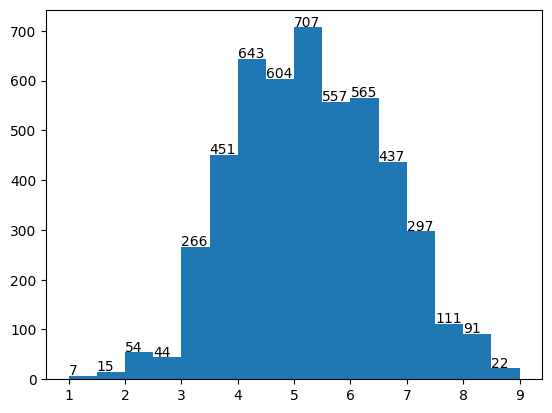

In [40]:
# convert the 'ratings' column into list
if type(df_firstRound['ratings'][0]) == str:
    df_firstRound['ratings'] = df_firstRound['ratings'].apply(lambda x: eval(x))
# find the number of reviews for each paper
df_firstRound['num_reviews'] = df_firstRound['ratings'].apply(lambda x: len(x))
# calculate the avg rating score for each paper
df_firstRound['avg_score'] = df_firstRound['ratings'].apply(lambda x: sum(x)/len(x))

# plot the histogram of the avg rating score
n, bins, patches = plt.hist(df_firstRound['avg_score'], bins=16,range=(1,9))
for bin_val, n_val in zip(bins, n):
    plt.text(bin_val, n_val+2, str(int(n_val)))

plt.show()

(0.0, 750.0)

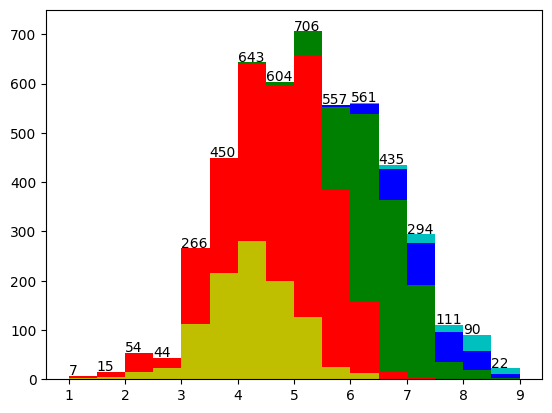

In [41]:
# plot the histogram of the avg rating score. If the 'decision' column is 'Reject', plot it in red. Otherwise, plot it in green.
# the green bars draw above the red bars
n_withdraw, bins_withdraw, patches = plt.hist(df_firstRound[df_firstRound['withdraw'] == 1]['avg_score'], bins=16,range=(1,9), color='y')
n_reject, bins_reject, patches = plt.hist(df_firstRound[df_firstRound['decision'] == 'Reject']['avg_score'], bins=16,range=(1,9),bottom=n_withdraw, color='r')
n_accept_poster, bins_accept_poster, patches = plt.hist(df_firstRound[df_firstRound['decision'] == 'Accept: poster']['avg_score'], bins=16,range=(1,9),bottom=n_withdraw+n_reject, color='g')
n_accept_25, bins_accept_25, patches = plt.hist(df_firstRound[df_firstRound['decision'] == 'Accept: notable-top-25%']['avg_score'], bins=16,range=(1,9),bottom=n_withdraw+n_reject + n_accept_poster, color='b')
n_accept_5, bins_accept_5, patches = plt.hist(df_firstRound[df_firstRound['decision'] == 'Accept: notable-top-5%']['avg_score'], bins=16,range=(1,9),bottom=n_withdraw+n_reject + n_accept_poster + n_accept_25, color='c')

for bin_val, n_val in zip(bins_withdraw, n_withdraw+n_reject+n_accept_poster+n_accept_25+n_accept_5):
    plt.text(bin_val, n_val+2, str(int(n_val)))

plt.ylim(0, 750)

In [108]:
def visualizeAcceptReject(df, score_type, bins=18):
    n_withdraw, bins_withdraw, patches = plt.hist(df_firstRound[df_firstRound['withdraw'] == 1][score_type], bins=bins,range=(1,10), color='y')
    n_reject, bins_reject, patches = plt.hist(df_firstRound[df_firstRound['decision'] == 'Reject'][score_type], bins=bins,range=(1,10),bottom=n_withdraw, color='r')
    n_accept_poster, bins_accept_poster, patches = plt.hist(df_firstRound[df_firstRound['decision'] == 'Accept: poster'][score_type], bins=bins,range=(1,10),bottom=n_withdraw+n_reject, color='g')
    n_accept_25, bins_accept_25, patches = plt.hist(df_firstRound[df_firstRound['decision'] == 'Accept: notable-top-25%'][score_type], bins=bins,range=(1,10),bottom=n_withdraw+n_reject + n_accept_poster, color='b')
    n_accept_5, bins_accept_5, patches = plt.hist(df_firstRound[df_firstRound['decision'] == 'Accept: notable-top-5%'][score_type], bins=bins,range=(1,10),bottom=n_withdraw+n_reject + n_accept_poster + n_accept_25, color='c')

    for bin_val, n_val in zip(bins_withdraw, n_withdraw+n_reject+n_accept_poster+n_accept_25+n_accept_5):
        plt.text(bin_val, n_val+2, str(int(n_val)))
    
    plt.ylim(0, int((n_withdraw+n_reject+n_accept_poster+n_accept_25+n_accept_5).max()*1.1))
    plt.show()

min_score
3    0.488711
5    0.247332
6    0.168103
1    0.076355
8    0.019499
Name: proportion, dtype: float64


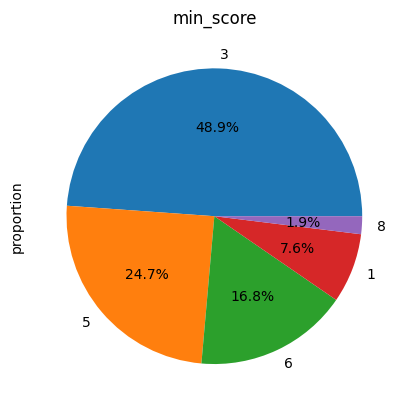

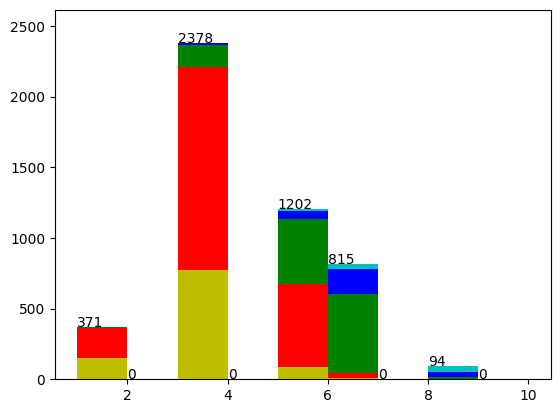

In [109]:
df_firstRound['min_score'] = df_firstRound['ratings'].apply(lambda x: min(x))
print(df_firstRound['min_score'].value_counts(normalize=True))
df_firstRound['min_score'].value_counts(normalize=True).plot.pie(autopct='%1.1f%%')
plt.title('min_score')
plt.show()
plt.cla()

# visualize the min score. If withdraw, plot in yellow. If reject, plot in red. If accept, plot in green.
visualizeAcceptReject(df_firstRound, 'min_score', 9)


max_score
8     0.362479
6     0.353654
5     0.209360
3     0.053777
10    0.019294
1     0.001437
Name: proportion, dtype: float64


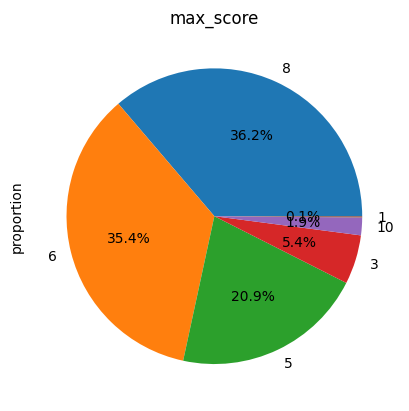

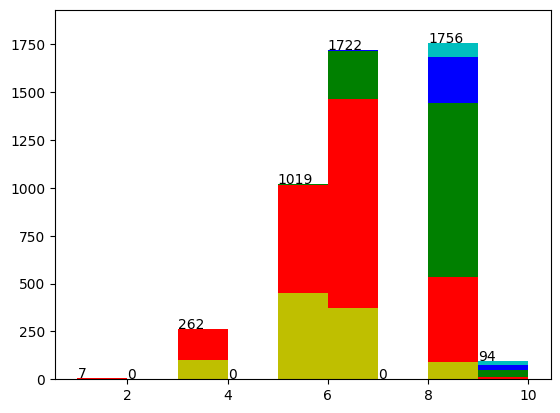

In [113]:
# calculate max score
df_firstRound['max_score'] = df_firstRound['ratings'].apply(lambda x: max(x))
print(df_firstRound['max_score'].value_counts(normalize=True))
df_firstRound['max_score'].value_counts(normalize=True).plot.pie(autopct='%1.1f%%')
plt.title('max_score')
plt.show()
plt.cla()

# visualize the max score. If withdraw, plot in yellow. If reject, plot in red. If accept, plot in green.
visualizeAcceptReject(df_firstRound, 'max_score', 9)

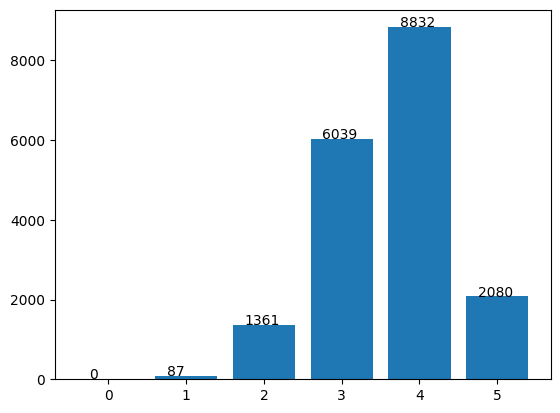

In [111]:
if type(df_firstRound['confidences'][0]) == str:
    df_firstRound['confidences'] = df_firstRound['confidences'].apply(lambda x: eval(x))
confidences = sum(df_firstRound['confidences'].values.tolist(),[])
bin_confidences = np.bincount(confidences)
# draw the histogram of the confidence score
plt.bar(range(len(bin_confidences)), bin_confidences)
# put text on the bar
for bin_val, n_val in zip(range(len(bin_confidences)), bin_confidences):
    plt.text(bin_val-0.25, n_val+3, str(int(n_val)))

[5,
 5,
 5,
 5,
 4,
 3,
 3,
 5,
 5,
 5,
 5,
 5,
 4,
 4,
 2,
 3,
 3,
 2,
 3,
 3,
 3,
 4,
 4,
 4,
 2,
 4,
 4,
 3,
 4,
 4,
 4,
 3,
 3,
 4,
 3,
 5,
 4,
 2,
 5,
 2,
 2,
 3,
 4,
 3,
 3,
 4,
 4,
 4,
 3,
 4,
 2,
 3,
 4,
 4,
 4,
 3,
 4,
 3,
 4,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 3,
 5,
 4,
 3,
 3,
 5,
 3,
 4,
 4,
 4,
 3,
 5,
 3,
 3,
 2,
 5,
 4,
 3,
 4,
 3,
 4,
 4,
 4,
 4,
 4,
 3,
 3,
 4,
 5,
 4,
 4,
 2,
 5,
 3,
 3,
 3,
 2,
 3,
 4,
 5,
 3,
 3,
 4,
 3,
 5,
 3,
 3,
 2,
 3,
 3,
 5,
 3,
 5,
 5,
 4,
 3,
 4,
 5,
 4,
 2,
 3,
 4,
 4,
 4,
 4,
 3,
 3,
 4,
 3,
 5,
 4,
 4,
 3,
 2,
 3,
 3,
 3,
 3,
 3,
 2,
 3,
 4,
 4,
 4,
 4,
 3,
 4,
 3,
 3,
 3,
 2,
 3,
 4,
 3,
 3,
 3,
 4,
 3,
 5,
 5,
 4,
 4,
 4,
 5,
 4,
 4,
 4,
 5,
 4,
 5,
 3,
 4,
 4,
 3,
 3,
 2,
 1,
 3,
 3,
 4,
 4,
 3,
 4,
 4,
 5,
 3,
 3,
 3,
 4,
 3,
 4,
 5,
 3,
 5,
 5,
 3,
 2,
 4,
 4,
 3,
 5,
 4,
 3,
 4,
 4,
 2,
 3,
 2,
 2,
 3,
 4,
 4,
 2,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 3,
 4,
 4,
 3,
 3,
 4,
 3,
 4,
 4,
 5,
 4,
 2,
 3,
 4,
 3,
 5,
 4,
 5,
 4,
 3,
